In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-aug-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-aug-2022/train.csv
/kaggle/input/tabular-playground-series-aug-2022/test.csv


In [2]:
#loading train and test set
train = pd.read_csv("/kaggle/input/tabular-playground-series-aug-2022/train.csv")
test = pd.read_csv("/kaggle/input/tabular-playground-series-aug-2022/test.csv")
print("train_shape:",train.shape)
print("test_shape:", test.shape)

train_shape: (26570, 26)
test_shape: (20775, 25)


Text(0.5, 1.0, 'Heatmap of missing values')

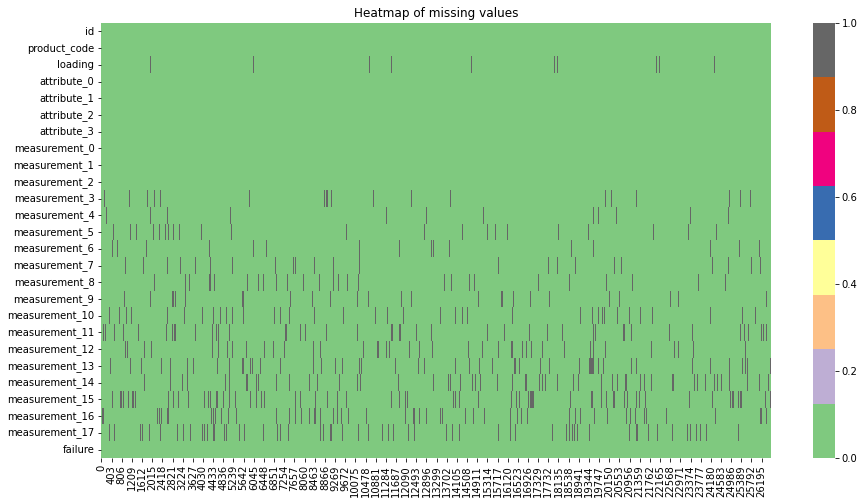

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap of missing values
plt.figure(figsize=(15,8))
sns.heatmap(train.isna().T, cmap='Accent')
plt.title('Heatmap of missing values')

In [4]:
#info on train set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

From the above information, a significant amount of missing values were present in the given data

In [5]:
#info on test set
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20775 entries, 0 to 20774
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20775 non-null  int64  
 1   product_code    20775 non-null  object 
 2   loading         20552 non-null  float64
 3   attribute_0     20775 non-null  object 
 4   attribute_1     20775 non-null  object 
 5   attribute_2     20775 non-null  int64  
 6   attribute_3     20775 non-null  int64  
 7   measurement_0   20775 non-null  int64  
 8   measurement_1   20775 non-null  int64  
 9   measurement_2   20775 non-null  int64  
 10  measurement_3   20446 non-null  float64
 11  measurement_4   20366 non-null  float64
 12  measurement_5   20267 non-null  float64
 13  measurement_6   20151 non-null  float64
 14  measurement_7   20055 non-null  float64
 15  measurement_8   19929 non-null  float64
 16  measurement_9   19871 non-null  float64
 17  measurement_10  19708 non-null 

Same goes for test set as well...

In [6]:
import sklearn as skl

Text(0.5, 1.0, 'Target label distribution')

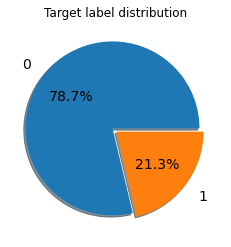

In [7]:
#distribution of target feature
train_y = train['failure']
plt.pie(train_y.value_counts(), explode=[0.05,0.01], autopct='%1.1f%%', labels = [0,1], labeldistance = 1.2, 
        textprops={'fontsize':14}, shadow = True)
plt.title('Target label distribution')

Target feature is not evenly balanced in this case

In [8]:
#droping target feature and description of numerical features
train.drop('failure', axis = 1, inplace = True)
train.describe()

,id,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
count,26570.000000,26320.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26189.000000,26032.000000,25894.000000,...,25522.000000,25343.000000,25270.000000,25102.000000,24969.000000,24796.000000,24696.000000,24561.000000,24460.000000,24286.000000
mean,13284.500000,127.826233,6.754046,7.240459,7.415883,8.232518,6.256568,17.791528,11.731988,17.127804,...,19.024714,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059
std,7670.242662,39.030020,1.471852,1.456493,4.116690,4.199401,3.309109,1.001200,0.996085,0.996414,...,1.008591,0.999137,1.405978,1.520785,1.488838,1.155247,1.491923,1.549226,1.708935,123.304161
min,0.000000,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,13.968000,8.008000,12.073000,...,15.217000,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000,196.787000
25%,6642.250000,99.987500,6.000000,6.000000,4.000000,5.000000,4.000000,17.117000,11.051000,16.443000,...,18.340250,10.757000,15.209000,18.170000,10.703000,14.890000,15.057000,13.957000,15.268000,618.961500
50%,13284.500000,122.390000,6.000000,8.000000,7.000000,8.000000,6.000000,17.787000,11.733000,17.132000,...,19.021000,11.430000,16.127000,19.211500,11.717000,15.628500,16.040000,14.969000,16.436000,701.024500
75%,19926.750000,149.152500,8.000000,8.000000,10.000000,11.000000,8.000000,18.469000,12.410000,17.805000,...,19.708000,12.102000,17.025000,20.207000,12.709000,16.374000,17.082000,16.018000,17.628000,784.090250
max,26569.000000,385.860000,9.000000,9.000000,29.000000,29.000000,24.000000,21.499000,16.484000,21.425000,...,23.807000,15.412000,22.479000,25.640000,17.663000,22.713000,22.303000,21.626000,24.094000,1312.794000


In [9]:
#description of categorical features
train.describe(include = ['object'])

,product_code,attribute_0,attribute_1
count,26570,26570,26570
unique,5,2,3
top,C,material_7,material_8
freq,5765,21320,10865


In [10]:
train.product_code.unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [11]:
test.product_code.unique()

array(['F', 'G', 'H', 'I'], dtype=object)

Train and test set have a completely different product codes. Having these feature during training is highly unlikely to give any beneficial result in prediction

In [12]:
test.describe(include = ['object'])

,product_code,attribute_0,attribute_1
count,20775,20775,20775
unique,4,2,3
top,F,material_5,material_6
freq,5422,10529,10529


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.25, random_state = 0)
for train_index, val_index in sss.split(train, train_y):
    train_x, val_x = train['loading'][train_index], train['loading'][val_index]
    train_y, val_y = train_y[train_index], train_y[val_index]

In [ ]:
from sklearn.impute import KNNImputer

knn_imp = KNNImputer(weight = 'distance')
train_imp = knn_imp.fit_transform(train, train_y)
val_imp = knn_imp.transform(val_x)

In [15]:
from sklearn.feature_selection import mutual_info_classif


for colname in train.select_dtypes(["object", "category"]):
        train[colname], _ = train[colname].factorize()
    # All discrete features should now have integer dtypes
discrete_features = [pd.api.types.is_integer_dtype(t) for t in train.dtypes]
    
mi_scores = mutual_info_classif(train, train_y,  discrete_features = discrete_features, random_state = 0)
mi_scores = pd.Series(mi_scores,name="MI Scores", index=train.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#number of missinb values per column in train set
null_values = pd.DataFrame()
null_values['train'] = train.isnull().sum()
null_values['test'] = test.isnull().sum()
null_values

In [ ]:
#reshaping dfs
train_x =  np.reshape(train_x.ravel(), (-1,1))
train_y = np.reshape(train_y.ravel(), (-1,1))
val_x = np.reshape(val_x.ravel(), (-1,1))
val_y = np.reshape(val_y.ravel(), (-1,1))

In [ ]:
print(val_x.shape, val_y.shape)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

my_pipe = Pipeline([('simple_imp', SimpleImputer(strategy = 'median')), ('forest_cls', RandomForestClassifier())])

parameters = {
  'forest_cls__n_estimators':[1,10,100,1000],
  'forest_cls__min_samples_split': [2,3,4,5]
  }
grid_pipeline = GridSearchCV(my_pipe,parameters)
grid_pipeline.fit(train_x.ravel(), train_y.ravel())
grid_pipeline.best_params_

In [ ]:
val_x.shape

In [ ]:
my_pipe.fit(train_x.to_numpy().reshape(-1, 1), train_y)
my_pipe.score(val_x.to_numpy().reshape(-1,1), val_y)

In [ ]:
preds = my_pipe.predict(test['loading'].to_numpy().reshape(-1,1))
preds[:10]

validation accuracy on random forest classifier - 0.69 while test accuracy was 0.504. Clearly random forest classifier is underfitting the data 

In [ ]:
# Save test predictions to file
output = pd.DataFrame({'id': test.id,
                       'failure': preds})
output.to_csv('submission.csv', index=False)